<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/03_Convolutional_Neural_Networks_%26_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

**Computer vision** is the practice of writing algorithms which can discover patterns in visual data (such as the camera of a self-driving car recognizing the car in front).

## What is a computer vision problem?


Example computer vision problem
* Binary Classification
* Multiclass Classification
* Object Detection


### Computer vision inputs and outputs
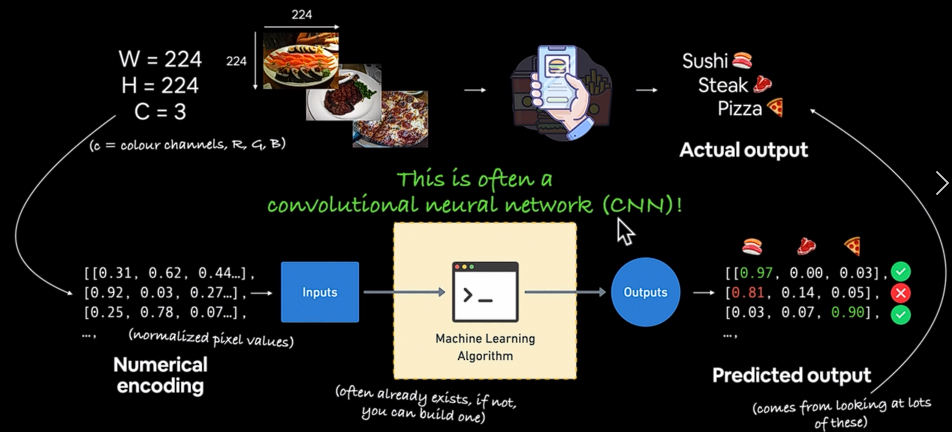


### Input and output shapes

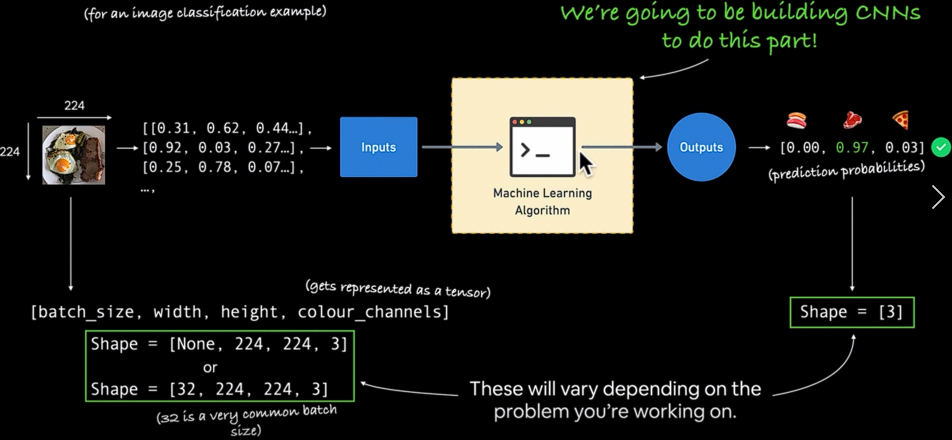


 ### Architecture of a CNN

 **Hyperparameter/Layer type** | **What does it do?** | **Typical values**
 ------------------------------|---------------------|-----------------
 Input image(s) | Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of
 Input layer | Takes in target images and preprocess them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]`
 Convolution layer | Extracts/learns the most important features from target images | Multiple, can be created with `tf.keras.layers.ConvXD` (X can be multiple values)
 Hidden Activation | Adds non-linearity to learned features | Usually ReLU (`tf.keras.activations.relu`)
 Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`)
 Fully connected layer | Further refines learned features from convolution layers | `tf.keras.layers.Dense`
 Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)
 Output activation | Add non-linearities to output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` (multiclass classification)


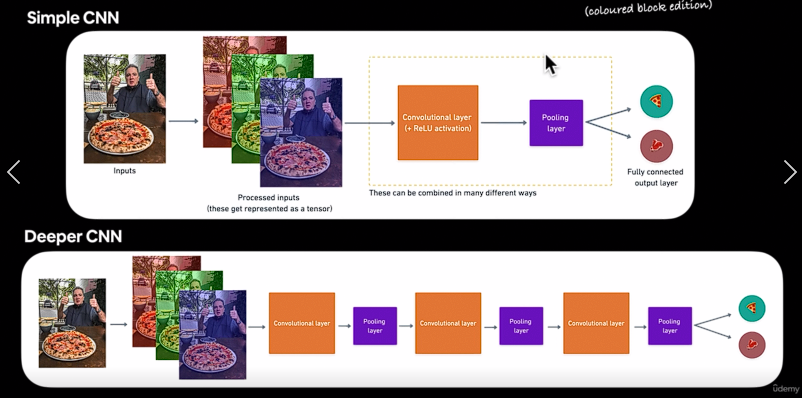

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-09-19 19:48:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   272MB/s    in 0.4s    

2022-09-19 19:48:32 (272 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
# Walk through pizza_steak directory and list number of files
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
!ls -la pizza_steak/

total 16
drwxr-xr-x 4 root root 4096 Sep 19 19:48 .
drwxr-xr-x 1 root root 4096 Sep 19 19:48 ..
drwxr-xr-x 4 root root 4096 Sep 19 19:48 test
drwxr-xr-x 4 root root 4096 Sep 19 19:48 train


In [7]:
# Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## Visualize the images

In [8]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # Created a list of class_names from the subdirectory in the training folder
print(class_names)

['pizza' 'steak']


In [9]:
# Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")  # show the shape of the image

  return img

Image shape: (512, 512, 3)


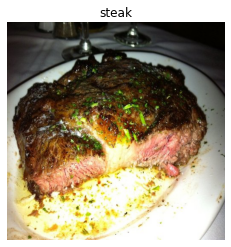

In [10]:
# View a random image from the steak directory
img = view_random_image(target_dir = "pizza_steak/train", target_class="steak")

Image shape: (384, 512, 3)


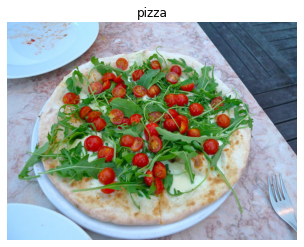

In [11]:
# View a random image from the pizza directory
img = view_random_image(target_dir = "pizza_steak/train", target_class="pizza")

In [12]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[151, 202, 247],
        [152, 203, 248],
        [153, 204, 249],
        ...,
        [ 66, 101, 131],
        [ 63,  98, 126],
        [ 60,  95, 123]],

       [[151, 202, 247],
        [151, 202, 247],
        [151, 202, 247],
        ...,
        [ 67, 104, 133],
        [ 63, 100, 127],
        [ 60,  97, 124]],

       [[151, 202, 247],
        [150, 201, 246],
        [150, 201, 246],
        ...,
        [ 63, 102, 131],
        [ 61, 100, 129],
        [ 58,  97, 126]],

       ...,

       [[147, 201, 248],
        [149, 203, 250],
        [150, 204, 251],
        ...,
        [133, 150, 170],
        [131, 147, 162],
        [131, 145, 158]],

       [[148, 202, 249],
        [149, 203, 250],
        [150, 204, 251],
        ...,
        [132, 149, 167],
        [131, 147, 162],
        [130, 147, 157]],

       [[148, 202, 249],
        [149, 203, 250],
        [149, 203, 250],
        ...,
        [131, 146, 16

In [13]:
# View the image shape
img.shape # return width, height, colour channels

(384, 512, 3)

🔑 **Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common *preprocessing* steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by **255** (since 255 is the maximum pixel value).

In [14]:
# Get all the pixel values between 0 & 1 (normalize the values)
img/255.

array([[[0.59215686, 0.79215686, 0.96862745],
        [0.59607843, 0.79607843, 0.97254902],
        [0.6       , 0.8       , 0.97647059],
        ...,
        [0.25882353, 0.39607843, 0.51372549],
        [0.24705882, 0.38431373, 0.49411765],
        [0.23529412, 0.37254902, 0.48235294]],

       [[0.59215686, 0.79215686, 0.96862745],
        [0.59215686, 0.79215686, 0.96862745],
        [0.59215686, 0.79215686, 0.96862745],
        ...,
        [0.2627451 , 0.40784314, 0.52156863],
        [0.24705882, 0.39215686, 0.49803922],
        [0.23529412, 0.38039216, 0.48627451]],

       [[0.59215686, 0.79215686, 0.96862745],
        [0.58823529, 0.78823529, 0.96470588],
        [0.58823529, 0.78823529, 0.96470588],
        ...,
        [0.24705882, 0.4       , 0.51372549],
        [0.23921569, 0.39215686, 0.50588235],
        [0.22745098, 0.38039216, 0.49411765]],

       ...,

       [[0.57647059, 0.78823529, 0.97254902],
        [0.58431373, 0.79607843, 0.98039216],
        [0.58823529, 0

## An end-to-end example

Build the convolutional neural network to find patterns in our images, we need to:

* Load the images
* Preprocess the images
* Build a CNN to find patterns in our images
* Compile the CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Set random seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, 
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the CNN model
history_1 = model_1.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 208ms/step - loss: 0.6020 - accuracy: 0.6527 - val_loss: 0.4475 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4396 - accuracy: 0.8067 - val_loss: 0.3980 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4084 - accuracy: 0.8207 - val_loss: 0.3287 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3479 - accuracy: 0.8433 - val_loss: 0.2962 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3044 - accuracy: 0.8800 - val_loss: 0.3878 - val_accuracy: 0.8200


In [17]:
model_1.save('/content/drive/MyDrive/Saved_Model/CNN_model_1')

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Trying a non-CNN model on our image data

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 1.0441 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


## Improving the non-CNN model

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Increase the layers, add more hidden units

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 3.7033 - accuracy: 0.6133 - val_loss: 0.4813 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.7633 - accuracy: 0.6980 - val_loss: 0.4863 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5914 - accuracy: 0.7307 - val_loss: 0.6027 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.5894 - accuracy: 0.7553 - val_loss: 0.5711 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.5491 - accuracy: 0.7620 - val_loss: 0.5002 - val_accuracy: 0.7460


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Breaking down Binary Classification

1. Become one with the data (visualize. visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create the model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat the baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


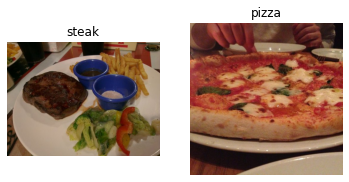

In [23]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess the data

In [24]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

The next step is to turn the data into **batches**.

A *batch* is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [25]:
# Create train and test data generators and rescale the data
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next()  # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
1500/32

46.875

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [31]:
images[7].shape

(224, 224, 3)

In [32]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A *baseline* is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),    # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')        # output layer (working with binary classification so only 1 output neuron)
])

In [35]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

* `steps_per_epoch` — this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [36]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 0.9974 - accuracy: 0.6627 - val_loss: 0.4709 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4321 - accuracy: 0.8127 - val_loss: 0.3948 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3109 - accuracy: 0.8807 - val_loss: 0.3856 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.1404 - accuracy: 0.9600 - val_loss: 0.4075 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.0680 - accuracy: 0.9847 - val_loss: 0.6105 - val_accuracy: 0.7640


### 5. Evaluating the model

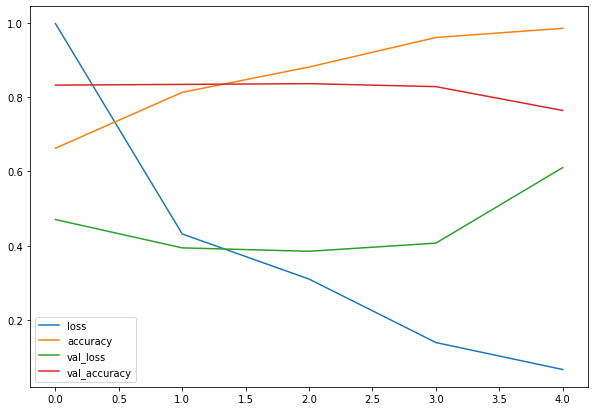

In [38]:
# Plotting the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [39]:
# Plotting the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and evaluation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))  # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy  
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

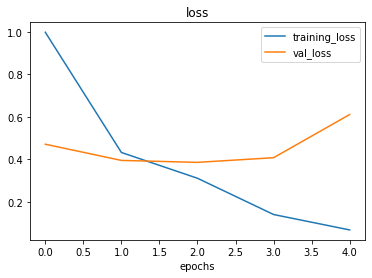

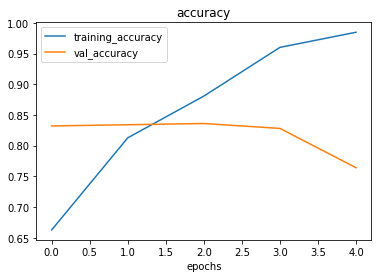

In [40]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

3 steps in fitting a machine learning model:

1. Create a baseline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

Ways to induce overfitting
* Increase the number of Conv layers
* Increase the number of Conv filters
* Add another Dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as `MaxPool2D`)
* Add more data...

🔑**Note:** Reducing overfitting is also known as **regularization**

In [41]:
# Create the new baseline model
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [42]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [43]:
history_5 = model_5.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 0.6323 - accuracy: 0.6100 - val_loss: 0.4917 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4671 - accuracy: 0.7840 - val_loss: 0.3959 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4239 - accuracy: 0.8180 - val_loss: 0.3728 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4300 - accuracy: 0.8140 - val_loss: 0.4008 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3871 - accuracy: 0.8313 - val_loss: 0.3178 - val_accuracy: 0.8760


In [44]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

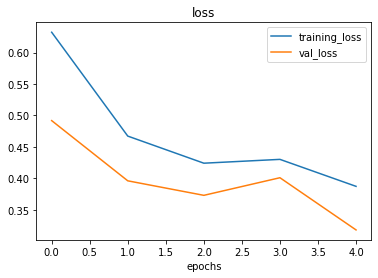

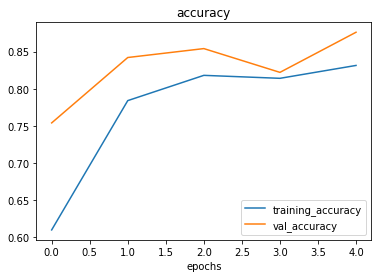

In [45]:
plot_loss_curves(history_5)

### Reducing overfitting with data augmentation

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.,
                                           horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is **data augmentation**?

*Data augmentation* is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalisation (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [47]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstraition purpose only

# Create non-augmented train data batcher
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [48]:
# Visualizing augmented data

# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  # labels aren't augmented... only data (images)

Showing image number: 5


(-0.5, 223.5, 223.5, -0.5)

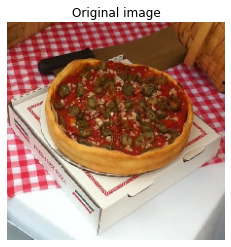

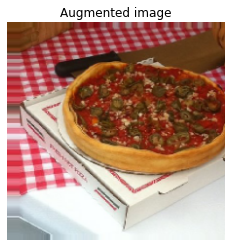

In [49]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

### Training a CNN model on augmented data

In [50]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [51]:
# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model with the augmented training data 
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 453ms/step - loss: 0.7433 - accuracy: 0.5180 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 445ms/step - loss: 0.6872 - accuracy: 0.5307 - val_loss: 0.6732 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 21s 449ms/step - loss: 0.7765 - accuracy: 0.6460 - val_loss: 0.6706 - val_accuracy: 0.5140
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.6811 - accuracy: 0.5420 - val_loss: 0.6448 - val_accuracy: 0.6300
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6627 - accuracy: 0.6240 - val_loss: 0.6072 - val_accuracy: 0.7580


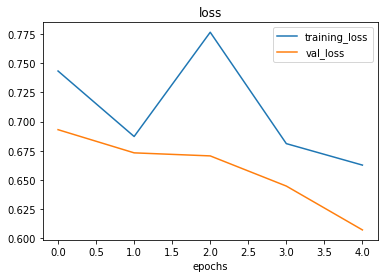

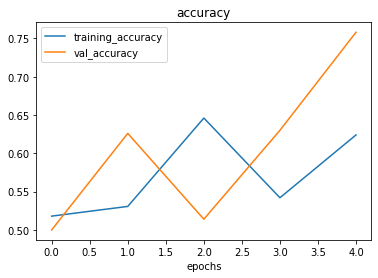

In [52]:
# Check the model's training curves
plot_loss_curves(history_6)

### Shuffle the augmented training data 

In [53]:
# Import data and augment it and shuffle from directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [54]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 452ms/step - loss: 0.6554 - accuracy: 0.6060 - val_loss: 0.5803 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 21s 448ms/step - loss: 0.5583 - accuracy: 0.7080 - val_loss: 0.4562 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 21s 445ms/step - loss: 0.4731 - accuracy: 0.7727 - val_loss: 0.3728 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4738 - accuracy: 0.7800 - val_loss: 0.3618 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4582 - accuracy: 0.7840 - val_loss: 0.3669 - val_accuracy: 0.8420


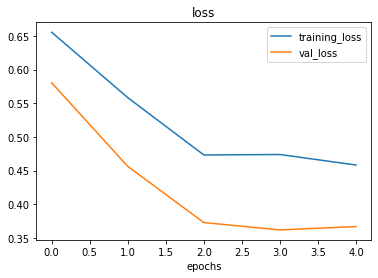

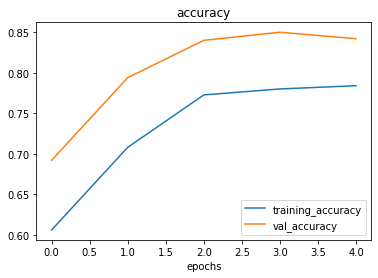

In [55]:
# Plot the loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Thing to try to continue to improve the model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice:** Recreate the model on the CNN explainer website and see how it performs on the augmented shuffled training data.

In [56]:
# Create the model
model_8 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 484ms/step - loss: 0.5915 - accuracy: 0.6627 - val_loss: 0.4827 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4858 - accuracy: 0.7793 - val_loss: 0.3863 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4800 - accuracy: 0.7853 - val_loss: 0.3945 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4762 - accuracy: 0.7767 - val_loss: 0.3867 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 23s 482ms/step - loss: 0.4579 - accuracy: 0.7980 - val_loss: 0.3476 - val_accuracy: 0.8580


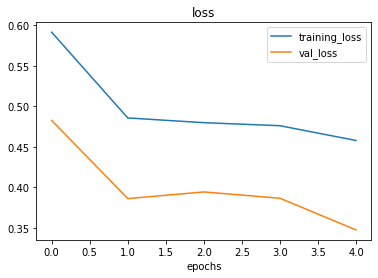

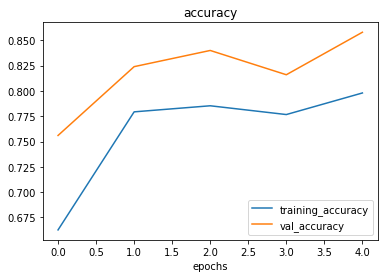

In [57]:
plot_loss_curves(history_8)

In [58]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [59]:
# Increase the filters from 10 to 32

model_9 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 499ms/step - loss: 0.5739 - accuracy: 0.6820 - val_loss: 0.3909 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4631 - accuracy: 0.7907 - val_loss: 0.4054 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 23s 493ms/step - loss: 0.4740 - accuracy: 0.7880 - val_loss: 0.3621 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4504 - accuracy: 0.7960 - val_loss: 0.3540 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4319 - accuracy: 0.8087 - val_loss: 0.3242 - val_accuracy: 0.8640


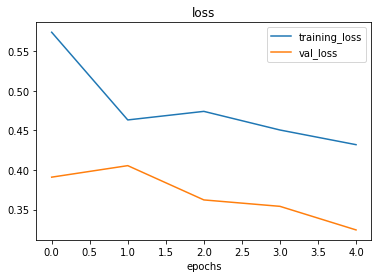

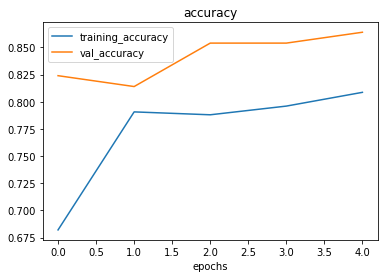

In [60]:
plot_loss_curves(history_9)

In [61]:
# Train for model_8 longer

model_8a = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8a.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8a = model_8a.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/10
47/47 [==============================] - 22s 462ms/step - loss: 0.5748 - accuracy: 0.7080 - val_loss: 0.3995 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 21s 455ms/step - loss: 0.4651 - accuracy: 0.7833 - val_loss: 0.3861 - val_accuracy: 0.8540
Epoch 3/10
47/47 [==============================] - 21s 452ms/step - loss: 0.4551 - accuracy: 0.8020 - val_loss: 0.3449 - val_accuracy: 0.8500
Epoch 4/10
47/47 [==============================] - 23s 489ms/step - loss: 0.4379 - accuracy: 0.8007 - val_loss: 0.3283 - val_accuracy: 0.8720
Epoch 5/10
47/47 [==============================] - 21s 456ms/step - loss: 0.4170 - accuracy: 0.8213 - val_loss: 0.3130 - val_accuracy: 0.8820
Epoch 6/10
47/47 [==============================] - 21s 454ms/step - loss: 0.4162 - accuracy: 0.8173 - val_loss: 0.3525 - val_accuracy: 0.8460
Epoch 7/10
47/47 [==============================] - 21s 454ms/step - loss: 0.3967 - accuracy: 0.8293 - val_loss: 0.2876 - val_accuracy: 0.8760

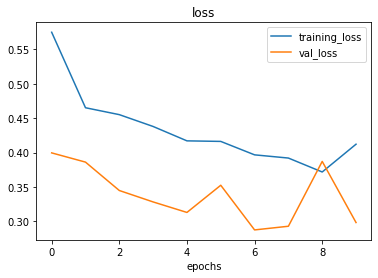

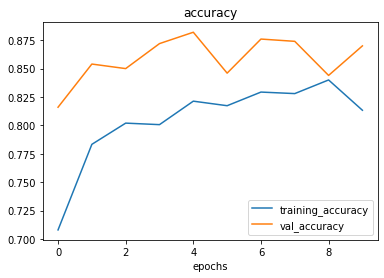

In [62]:
plot_loss_curves(history_8a)

In [63]:
# Train model_9 for longer

model_9a = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_9a.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_9a = model_9a.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 495ms/step - loss: 0.6477 - accuracy: 0.6253 - val_loss: 0.4243 - val_accuracy: 0.8220
Epoch 2/10
47/47 [==============================] - 22s 470ms/step - loss: 0.4903 - accuracy: 0.7707 - val_loss: 0.4314 - val_accuracy: 0.7960
Epoch 3/10
47/47 [==============================] - 22s 469ms/step - loss: 0.4524 - accuracy: 0.7960 - val_loss: 0.3620 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 22s 468ms/step - loss: 0.4331 - accuracy: 0.8007 - val_loss: 0.3345 - val_accuracy: 0.8440
Epoch 5/10
47/47 [==============================] - 22s 471ms/step - loss: 0.4295 - accuracy: 0.8193 - val_loss: 0.3428 - val_accuracy: 0.8520
Epoch 6/10
47/47 [==============================] - 22s 469ms/step - loss: 0.4221 - accuracy: 0.8173 - val_loss: 0.3240 - val_accuracy: 0.8760
Epoch 7/10
47/47 [==============================] - 23s 486ms/step - loss: 0.4348 - accuracy: 0.8160 - val_loss: 0.3616 - val_accuracy: 0.8380

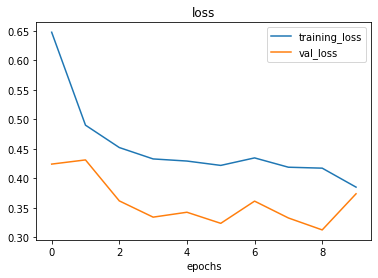

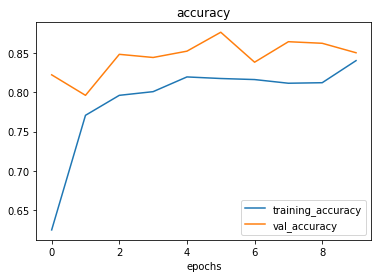

In [64]:
plot_loss_curves(history_9a)

In [65]:
# Increase model layers

model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data_augmented_shuffled,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented_shuffled),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 467ms/step - loss: 0.6231 - accuracy: 0.6540 - val_loss: 0.4761 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5015 - accuracy: 0.7760 - val_loss: 0.3921 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.4883 - accuracy: 0.7813 - val_loss: 0.3858 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4586 - accuracy: 0.8000 - val_loss: 0.3691 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 479ms/step - loss: 0.4821 - accuracy: 0.7880 - val_loss: 0.4013 - val_accuracy: 0.8200


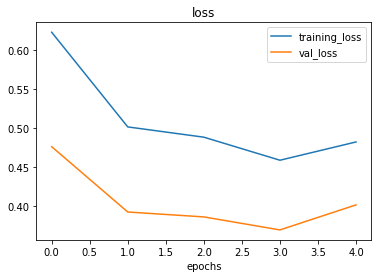

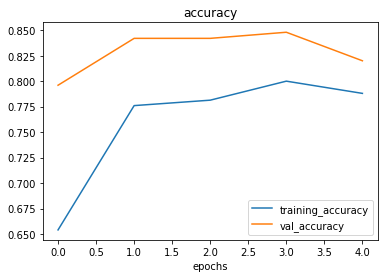

In [68]:
plot_loss_curves(history_10)

## Making a prediction with our trained model on our own custom data

In [66]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [69]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow

--2022-09-19 20:12:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-09-19 20:12:11 (32.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

In [70]:
# Check the shape of the image
steak.shape

(4032, 3024, 3)

In [71]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

### Create a function to import an image and resize it

In [72]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and  1)
  img = img/255.
  return img

In [74]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [88]:
# Make a prediction
steak_expanded = tf.expand_dims(steak, axis=0)
pred_7 = model_7.predict(steak_expanded)

In [84]:
pred_8 = model_8.predict(steak_expanded)

In [85]:
pred_8a = model_8a.predict(steak_expanded)

In [86]:
pred_9 = model_9.predict(steak_expanded)

In [87]:
pred_9a = model_9a.predict(steak_expanded)

In [89]:
pred_10 = model_10.predict(steak_expanded)

In [90]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [97]:
# We can index the predicted class by rounding the prediction probability and
# indexing it on the class names
def _pred_class(prediction):
  pred = class_names[int(tf.round(pred_7))]
  return pred

In [98]:
print(f"Model_7: {pred_class(pred_7)}")
print(f"Model_8: {pred_class(pred_8)}")
print(f"Model_8a: {pred_class(pred_8a)}")
print(f"Model_9: {pred_class(pred_9)}")
print(f"Model_9a: {pred_class(pred_9a)}")
print(f"Model_10: {pred_class(pred_10)}")

Model_7: steak
Model_8: steak
Model_8a: steak
Model_9: steak
Model_9a: steak
Model_10: steak


In [99]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

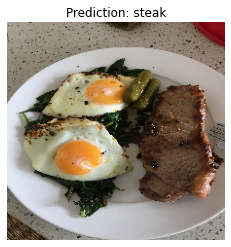

In [100]:
# Test our model on an custom image
pred_and_plot(model_7, '03-steak.jpeg')

In [106]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://www.recipetineats.com/wp-content/uploads/2020/05/Pepperoni-Pizza_5-SQjpg.jpg
!wget https://www.kitchensanctuary.com/wp-content/uploads/2021/09/How-to-cook-the-perfect-steak-square-FS.jpg

--2022-09-19 20:44:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-09-19 20:44:12 (42.0 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

--2022-09-19 20:44:12--  https://www.recipetineats.com/wp-content/uploads/2020/05/Pepperoni-Pizza_5-SQjpg.jpg
Resolving www.recipetineats.com (www.recipetineats.com)... 192.0.66.112
Connecting to www.recipetineats.com (www.recipetineats.com)|192.0.66.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77670 (76K) [image/jpeg]
Saving to: ‘Pepper

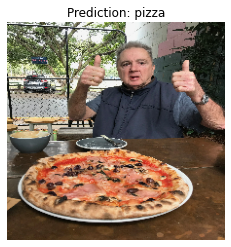

In [102]:
pred_and_plot(model_8a, '03-pizza-dad.jpeg')

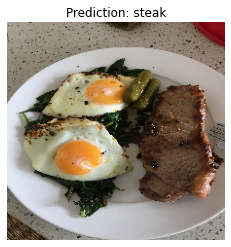

In [103]:
pred_and_plot(model_8a, '03-steak.jpeg')

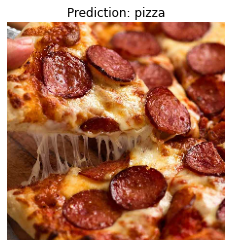

In [105]:
pred_and_plot(model_8a, 'Pepperoni-Pizza_5-SQjpg.jpg')

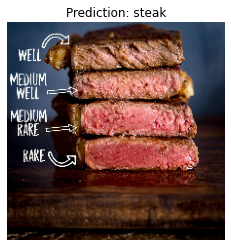

In [107]:
pred_and_plot(model_8a, 'How-to-cook-the-perfect-steak-square-FS.jpg')

--2022-09-19 20:50:21--  https://i.ytimg.com/vi/nsw0Px-Pho8/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 172.217.212.119, 142.250.1.119, 108.177.111.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|172.217.212.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167624 (164K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>] 163.70K  --.-KB/s    in 0.001s  

2022-09-19 20:50:21 (132 MB/s) - ‘maxresdefault.jpg’ saved [167624/167624]



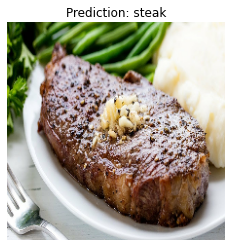

In [109]:
!wget https://i.ytimg.com/vi/nsw0Px-Pho8/maxresdefault.jpg
pred_and_plot(model_8a, 'maxresdefault.jpg')

--2022-09-19 20:52:01--  https://hips.hearstapps.com/amv-prod-tpw.s3.amazonaws.com/wp-content/uploads/2011/09/steakhousepizza1.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51395 (50K) [image/jpeg]
Saving to: ‘steakhousepizza1.jpg’

steakhousepizza1.jp 100%[===================>]  50.19K  --.-KB/s    in 0.01s   

2022-09-19 20:52:01 (4.63 MB/s) - ‘steakhousepizza1.jpg’ saved [51395/51395]



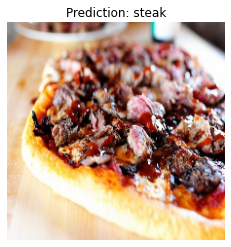

In [110]:
!wget https://hips.hearstapps.com/amv-prod-tpw.s3.amazonaws.com/wp-content/uploads/2011/09/steakhousepizza1.jpg
pred_and_plot(model_8a, 'steakhousepizza1.jpg')

--2022-09-19 20:52:57--  https://cdn3.tmbi.com/toh/GoogleImagesPostCard/exps114761_SSD143207D06_05_2b.jpg
Resolving cdn3.tmbi.com (cdn3.tmbi.com)... 172.64.153.241, 104.18.34.15, 2606:4700:4400::6812:220f, ...
Connecting to cdn3.tmbi.com (cdn3.tmbi.com)|172.64.153.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250450 (245K) [image/jpeg]
Saving to: ‘exps114761_SSD143207D06_05_2b.jpg’

exps114761_SSD14320 100%[===================>] 244.58K  --.-KB/s    in 0.05s   

2022-09-19 20:52:58 (4.53 MB/s) - ‘exps114761_SSD143207D06_05_2b.jpg’ saved [250450/250450]



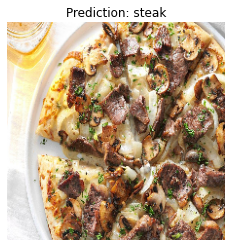

In [111]:
!wget https://cdn3.tmbi.com/toh/GoogleImagesPostCard/exps114761_SSD143207D06_05_2b.jpg
pred_and_plot(model_8a, 'exps114761_SSD143207D06_05_2b.jpg')

## Multi-class Image Classification

1. Become one with the data
2. Preprocess the data
3. Create a baseline model
4. Fit the model (overfit it)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [112]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-09-19 20:56:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 142.250.152.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   280MB/s    in 1.8s    

2022-09-19 20:56:14 (280 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [113]:
import os

# Walkthrough the image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 10 directorie

In [114]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [115]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


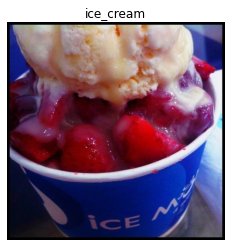

In [123]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data

In [127]:
from keras_preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [126]:
# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create the baseline model

In [132]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [133]:
model_8a.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [137]:
# Create the model
model_11 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

### 4. Fit the model

In [138]:
# Fit the model
history_11 = model_11.fit(train_data, epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 191ms/step - loss: 2.1222 - accuracy: 0.2343 - val_loss: 1.9613 - val_accuracy: 0.3104
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 1.8713 - accuracy: 0.3555 - val_loss: 1.9502 - val_accuracy: 0.3276
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.5573 - accuracy: 0.4668 - val_loss: 1.9135 - val_accuracy: 0.3380
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.1046 - accuracy: 0.6335 - val_loss: 2.2822 - val_accuracy: 0.3256
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.5822 - accuracy: 0.8144 - val_loss: 2.7739 - val_accuracy: 0.2844
